# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | mtwara
Processing Record 11 of Set 1 | cockburn town
Processing Record 12 of Set 1 | guanambi
Processing Record 13 of Set 1 | walvis bay
Processing Record 14 of Set 1 | maintirano
Processing Record 15 of Set 1 | alice springs
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | sierpc
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | port douglas
Processing Record 20 of Set 1 | kruisfontein
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,8.05,94,100,1.45,CL,1702168592
1,adamstown,-25.0660,-130.1015,21.62,78,100,3.26,PN,1702168592
2,east london,-33.0153,27.9116,16.04,87,100,5.10,ZA,1702168592
3,edinburgh of the seven seas,-37.0676,-12.3116,13.97,76,100,7.11,SH,1702168593
4,port-aux-francais,-49.3500,70.2167,3.09,80,99,12.22,TF,1702168523


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,8.05,94,100,1.45,CL,1702168592
1,adamstown,-25.0660,-130.1015,21.62,78,100,3.26,PN,1702168592
2,east london,-33.0153,27.9116,16.04,87,100,5.10,ZA,1702168592
3,edinburgh of the seven seas,-37.0676,-12.3116,13.97,76,100,7.11,SH,1702168593
4,port-aux-francais,-49.3500,70.2167,3.09,80,99,12.22,TF,1702168523


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

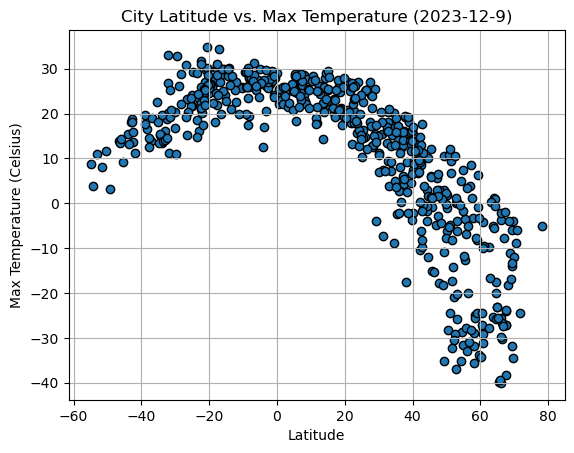

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-12-9)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

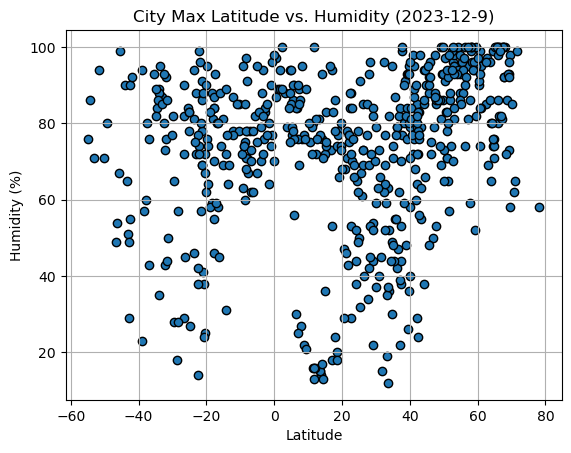

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-12-9)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

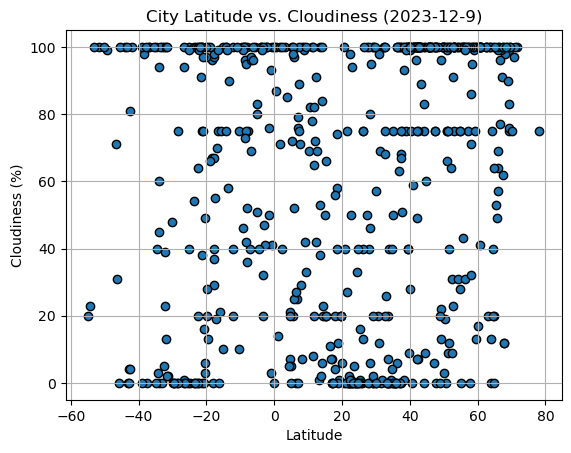

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-12-9)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

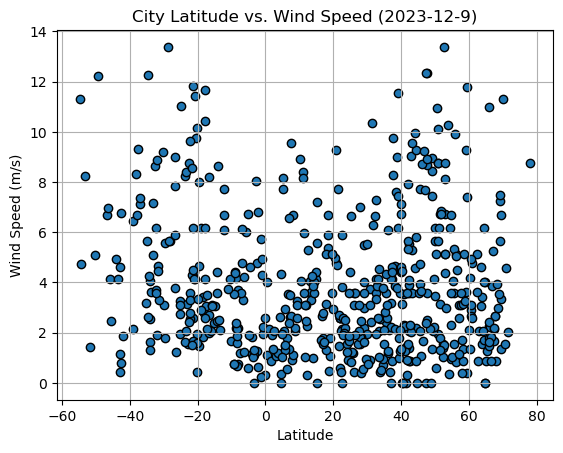

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-12-9)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_regression(df, x_value_header, y_value_header, x_coord_int, y_coord_int):

    # Store Latitude and Temperature as x and y values
    x_values = df[x_value_header]
    y_values = df[y_value_header]

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_coord_int,y_coord_int),fontsize=15,color="red")

    # Label plot
    plt.xlabel(x_value_header)
    plt.ylabel(y_value_header)

    # Print r square value
    print(f"The r-value is: {rvalue}")
    print(f"The r-squared value is: {rvalue**2}")

    # Show plot
    plt.show()


In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,thompson,55.7435,-97.8558,-6.91,93,100,1.54,CA,1702168471
8,cockburn town,21.4612,-71.1419,25.98,78,75,7.72,TC,1702168513
14,sierpc,52.8568,19.6691,-0.03,96,91,4.39,PL,1702168594
15,petropavlovsk-kamchatsky,53.0452,158.6483,0.33,95,75,6.71,RU,1702168594
18,talnakh,69.4865,88.3972,-34.48,98,100,3.33,RU,1702168594


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,8.05,94,100,1.45,CL,1702168592
1,adamstown,-25.0660,-130.1015,21.62,78,100,3.26,PN,1702168592
2,east london,-33.0153,27.9116,16.04,87,100,5.10,ZA,1702168592
3,edinburgh of the seven seas,-37.0676,-12.3116,13.97,76,100,7.11,SH,1702168593
4,port-aux-francais,-49.3500,70.2167,3.09,80,99,12.22,TF,1702168523


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8342810902185389
The r-squared value is: 0.6960249374962338


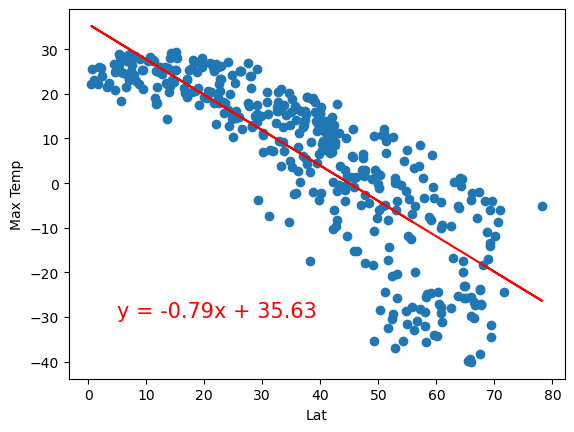

In [26]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Max Temp", 5, -30)

The r-value is: 0.6834405619502177
The r-squared value is: 0.4670910017188294


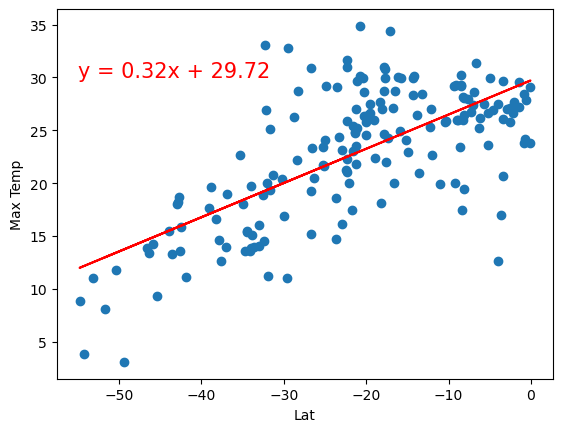

In [34]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Max Temp", -55, 30)

**Discussion about the linear relationship:** There is a strong linear relationship between the latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.349986816210704
The r-squared value is: 0.1224907715213051


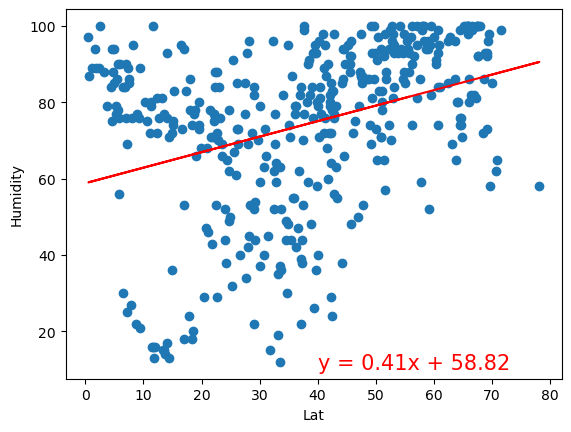

In [28]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Humidity", 40, 10)

The r-value is: 0.14183403381251541
The r-squared value is: 0.020116893147529766


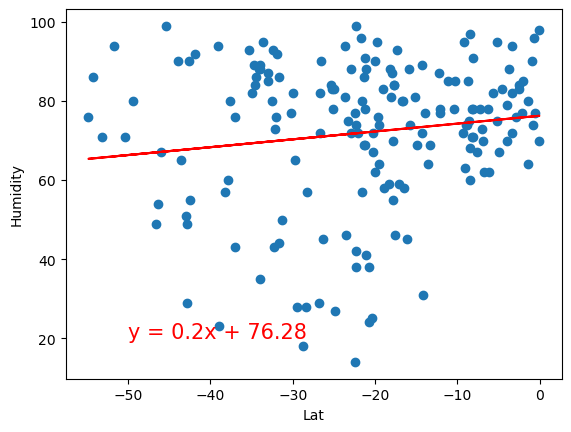

In [29]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Humidity", -50, 20)

**Discussion about the linear relationship:** There is a weak relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3199974893361609
The r-squared value is: 0.1023983931814464


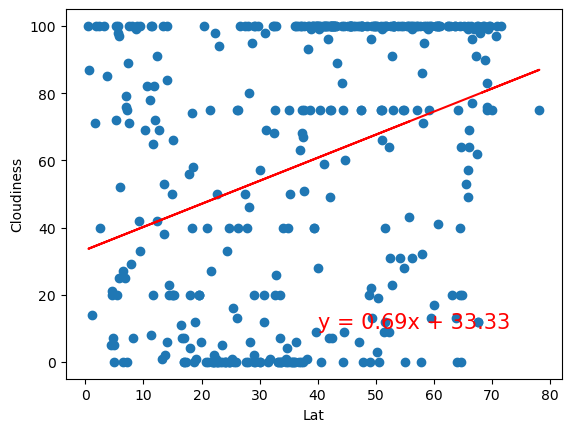

In [30]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Cloudiness", 40, 10)

The r-value is: 0.16881520234949413
The r-squared value is: 0.028498572544300646


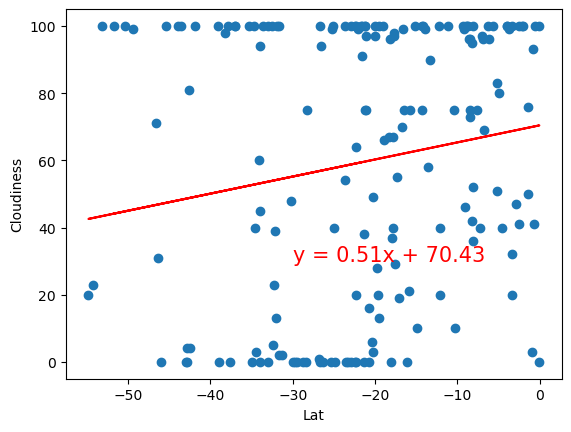

In [35]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Cloudiness", -30, 30)

**Discussion about the linear relationship:** There is a weak relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1389411912851176
The r-squared value is: 0.019304654635727635


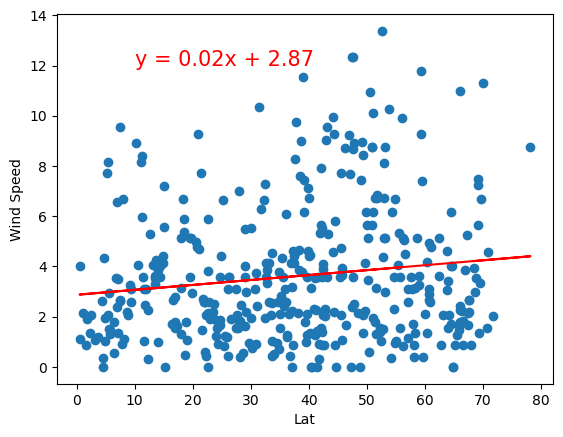

In [32]:
# Northern Hemisphere
linear_regression(northern_hemi_df, "Lat", "Wind Speed", 10, 12)

The r-value is: -0.2920496109966665
The r-squared value is: 0.08529297528330422


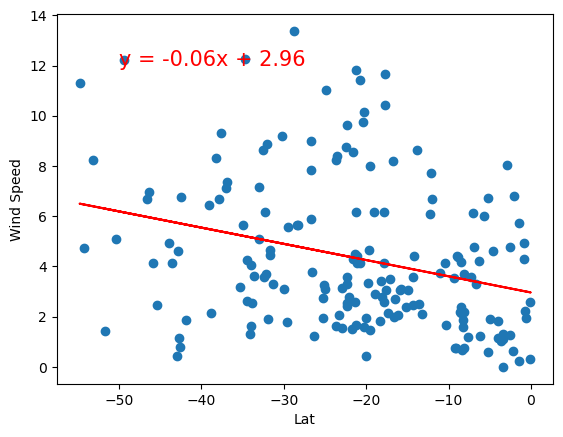

In [33]:
# Southern Hemisphere
linear_regression(southern_hemi_df, "Lat", "Wind Speed", -50, 12)

**Discussion about the linear relationship:** There is a weak relationship between latitude and wind speed.